# Deep Learning com o dataset Fashion MNIST
Usando tensorflow para identificação de imagens de moda. As imagens pertencem a 10 categorias diferentes e estão em tons de cinza de 28x28.
## Importando os dados

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

In [3]:
len(imagens_treino)

60000

In [4]:
imagens_treino.shape

(60000, 28, 28)

In [5]:
len(identificacoes_teste)

10000

In [6]:
imagens_teste.shape

(10000, 28, 28)

In [7]:
identificacoes_treino.min(), identificacoes_treino.max()

(0, 9)

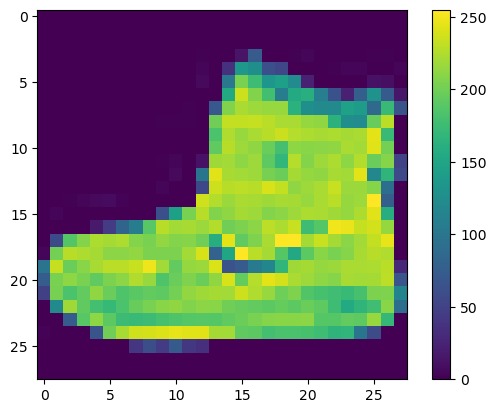

In [8]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()

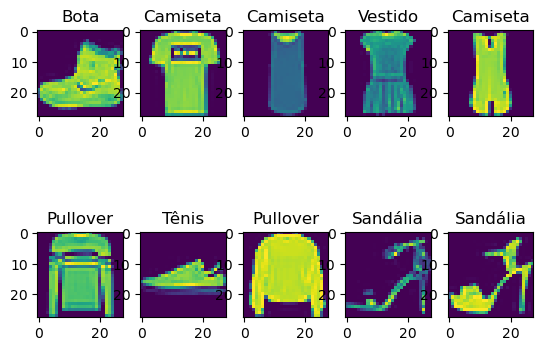

In [9]:
for imagem in range(10):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])

## Treinando os modelos - configurando hiperparâmetros

In [10]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

D:\Users\guifr\anaconda3\envs\estudo\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 12.5151


#### Normalizando as imagens

In [11]:
imagens_treino = imagens_treino/float(255)

In [12]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.5921


#### Adicionando camadas ocultas

In [13]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

modelo.fit(imagens_treino, identificacoes_treino)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6161


#### Adicionando uma métrica e aumentando as épocas

In [14]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.7784 - loss: 0.6167
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8657 - loss: 0.3643
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8809 - loss: 0.3244
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8859 - loss: 0.3044
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8929 - loss: 0.2882


#### Separando parte do dataset para a validação

In [15]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7638 - loss: 0.6631 - val_accuracy: 0.8604 - val_loss: 0.3924
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8636 - loss: 0.3731 - val_accuracy: 0.8566 - val_loss: 0.3912
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8756 - loss: 0.3354 - val_accuracy: 0.8634 - val_loss: 0.3685
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8817 - loss: 0.3132 - val_accuracy: 0.8627 - val_loss: 0.3820
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8917 - loss: 0.2926 - val_accuracy: 0.8596 - val_loss: 0.3742


### Visualizando graficamente a evolução do treinamento

In [16]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
resultado teste: 2
número da imagem de teste: 2


In [17]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8311 - loss: 58.7752
Perda do teste: 60.699249267578125
Acurácia do teste: 0.8331999778747559


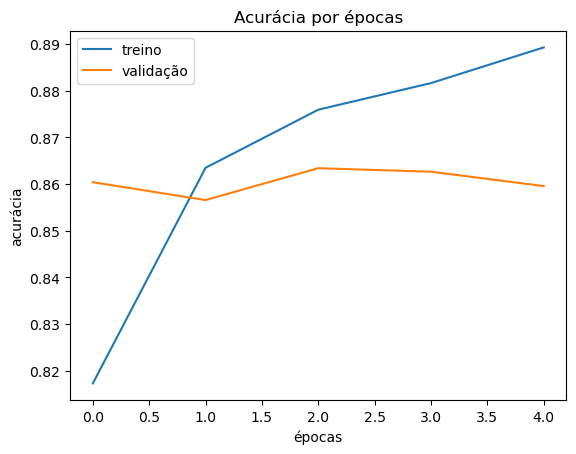

In [18]:
plt.plot(historico.history['accuracy'], )
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

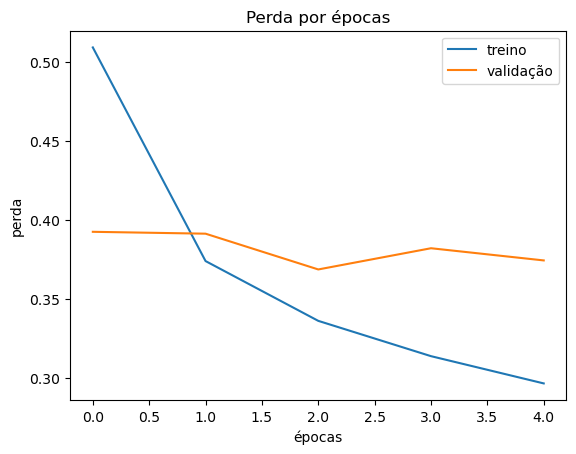

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [20]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(128, activation=tensorflow.nn.relu),
    keras.layers.Dense(64, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7728 - loss: 0.6331 - val_accuracy: 0.8453 - val_loss: 0.4199
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8621 - loss: 0.3783 - val_accuracy: 0.8675 - val_loss: 0.3612
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8744 - loss: 0.3357 - val_accuracy: 0.8721 - val_loss: 0.3530
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8849 - loss: 0.3113 - val_accuracy: 0.8773 - val_loss: 0.3444
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8933 - loss: 0.2881 - val_accuracy: 0.8828 - val_loss: 0.3236
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8981 - loss: 0.2721 - val_accuracy: 0.8869 - val_loss: 0.3156
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2534 - val_accuracy: 0.8823 - val_loss: 0.3251
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9049 - loss: 0.2510 - 

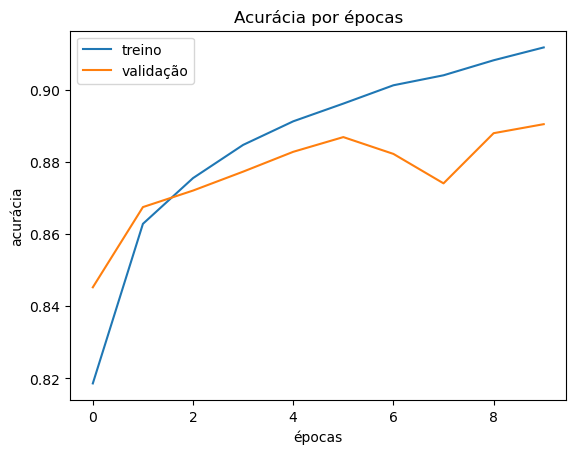

In [21]:
plt.plot(historico.history['accuracy'], )
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

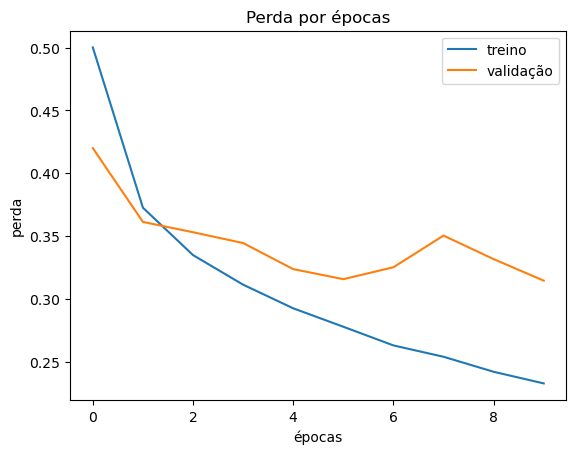

In [22]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [23]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7784 - loss: 0.6412 - val_accuracy: 0.8493 - val_loss: 0.4207
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8588 - loss: 0.3911 - val_accuracy: 0.8691 - val_loss: 0.3561
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8790 - loss: 0.3361 - val_accuracy: 0.8652 - val_loss: 0.3698
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8842 - loss: 0.3131 - val_accuracy: 0.8758 - val_loss: 0.3383
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8909 - loss: 0.2915 - val_accuracy: 0.8773 - val_loss: 0.3393
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8967 - loss: 0.2742 - val_accuracy: 0.8833 - val_loss: 0.3202
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9019 - loss: 0.2601 - val_accuracy: 0.8782 - val_loss: 0.3342
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9053 - loss: 0.2552 - 

In [24]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7657 - loss: 0.6713 - val_accuracy: 0.8553 - val_loss: 0.4001
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8521 - loss: 0.4038 - val_accuracy: 0.8644 - val_loss: 0.3731
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8650 - loss: 0.3631 - val_accuracy: 0.8533 - val_loss: 0.3766
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8725 - loss: 0.3407 - val_accuracy: 0.8648 - val_loss: 0.3741
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8787 - loss: 0.3264 - val_accuracy: 0.8771 - val_loss: 0.3374
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8858 - loss: 0.3102 - val_accuracy: 0.8811 - val_loss: 0.3245
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8895 - loss: 0.3024 - val_accuracy: 0.8837 - val_loss: 0.3182
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.2897 - 

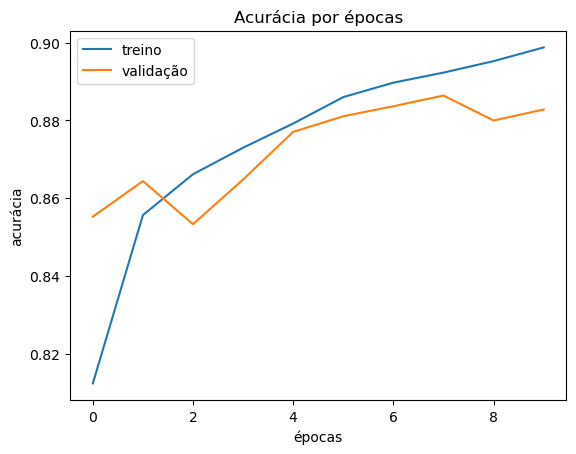

In [25]:
plt.plot(historico.history['accuracy'], )
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

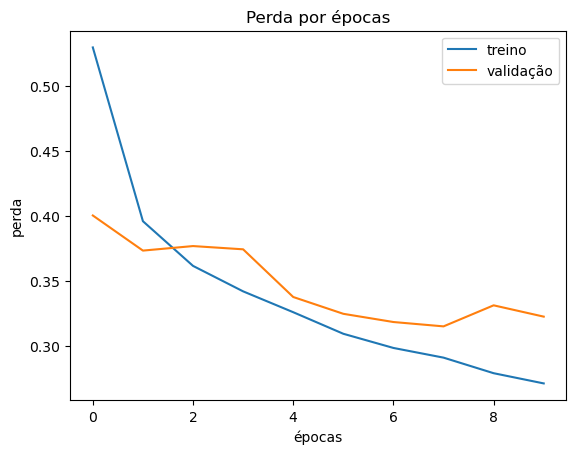

In [26]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

## Salvando o modelo final

## Explorando as etapas do treinamento

In [35]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
resultado teste: 2
número da imagem de teste: 2
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
resultado teste modelo salvo: 2
número da imagem de teste: 2


In [36]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

D:\Users\guifr\anaconda3\envs\estudo\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7665 - loss: 0.6665 - val_accuracy: 0.8572 - val_loss: 0.4007
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8533 - loss: 0.4038 - val_accuracy: 0.8688 - val_loss: 0.3667
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8669 - loss: 0.3631 - val_accuracy: 0.8668 - val_loss: 0.3602
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8773 - loss: 0.3351 - val_accuracy: 0.8776 - val_loss: 0.3338
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8802 - loss: 0.3219 - val_accuracy: 0.8794 - val_loss: 0.3305


In [37]:
sumario_do_modelo = modelo.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

In [38]:
pesos_camada_dense, vieses_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

array([[ 0.04593396, -0.04745677,  0.00389943, ..., -0.1282502 ,
         0.04598985, -0.05057353],
       [-0.05774744,  0.09432214, -0.08130611, ...,  0.0865785 ,
        -0.01791519,  0.0738441 ],
       [-0.03590934,  0.23510271,  0.15878385, ..., -0.15765998,
        -0.02753273, -0.01753168],
       ...,
       [-0.09162612,  0.05514572, -0.02363258, ..., -0.20431711,
         0.04073574,  0.17370602],
       [ 0.12738615,  0.03356299,  0.08559532, ..., -0.3729861 ,
        -0.00230716, -0.13319989],
       [ 0.061182  ,  0.03921788, -0.04505698, ..., -0.2365688 ,
         0.0413278 , -0.04154537]], dtype=float32)

In [39]:
pesos_camada_dense.shape

(784, 256)

In [40]:
pesos_camada_dense_zerados = np.zeros(pesos_camada_dense.shape)

modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense]
)

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([-1.19833775e-01,  8.21977183e-02, -4.25149798e-02, -9.80720110e-03,
        -8.03817585e-02, -4.17212658e-02, -1.48904976e-02,  1.58920884e-01,
        -1.92293808e-01,  2.12675765e-01,  1.36825636e-01,  2.35907674e-01,
         3.37973624e-01,  1.69119418e-01, -6.97704731e-03, -1.05890982e-01,
         3.48197162e-01, -2.17340551e-02,  8.34843367e-02,  3.33433121e-01,
        -2.93312252e-01,  2.86222696e-01,  4.11143810e-01, -2.29511485e-02,
        -1.79560706e-02,  2.75214374e-01,  1.98242534e-03,  2.94173568e-01,
         1.24289408e-01,  2.68838584e-01,  5.48909247e-01,  2.00378075e-01,
         2.75046468e-01, -7.20273852e-02, -5.28871641e-03,  4.34176445e-01,
         2.85355508e-01, -1.64431855e-02,  1.4808283

In [41]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7471 - loss: 0.7130 - val_accuracy: 0.8525 - val_loss: 0.4080
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8471 - loss: 0.4134 - val_accuracy: 0.8583 - val_loss: 0.3867
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8601 - loss: 0.3790 - val_accuracy: 0.8657 - val_loss: 0.3756
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8667 - loss: 0.3565 - val_accuracy: 0.8650 - val_loss: 0.3579
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8740 - loss: 0.3371 - val_accuracy: 0.8738 - val_loss: 0.3396


In [42]:
pesos_camada_dense_aleatorios = np.random.rand(pesos_camada_dense.shape[0], pesos_camada_dense.shape[1])

In [43]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense]
)

In [44]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2910 - loss: 236.1507 - val_accuracy: 0.7059 - val_loss: 20.1140
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6057 - loss: 38.6199 - val_accuracy: 0.7613 - val_loss: 10.0664
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6860 - loss: 17.2173 - val_accuracy: 0.7953 - val_loss: 5.8939
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7286 - loss: 8.1989 - val_accuracy: 0.7721 - val_loss: 3.9440
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7520 - loss: 4.4490 - val_accuracy: 0.7492 - val_loss: 2.5377


In [45]:
modelo.get_config()

{'name': 'sequential_8',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer_8'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten_8',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense_24',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
 

In [46]:
vieses_camada_dense.shape

(256,)

In [47]:
vieses_camada_dense_zerados = np.zeros(vieses_camada_dense.shape)

In [48]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_zerados, vieses_camada_dense_zerados]
)

In [49]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1007 - loss: 2.5282 - val_accuracy: 0.0995 - val_loss: 2.3333
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1013 - loss: 2.3183 - val_accuracy: 0.0995 - val_loss: 2.3037
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1010 - loss: 2.3031 - val_accuracy: 0.0983 - val_loss: 2.3028
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0981 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1010 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3027


In [50]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2905 - loss: 73.5301 - val_accuracy: 0.6729 - val_loss: 6.3674
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5616 - loss: 12.6799 - val_accuracy: 0.6340 - val_loss: 4.7888
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6315 - loss: 7.0136 - val_accuracy: 0.7176 - val_loss: 2.7344
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6785 - loss: 4.0721 - val_accuracy: 0.7698 - val_loss: 1.9554
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7151 - loss: 2.6717 - val_accuracy: 0.7993 - val_loss: 1.3769


In [51]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

adam = keras.optimizers.Adam(learning_rate=0.002)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3464 - loss: 30.1116 - val_accuracy: 0.7447 - val_loss: 3.9456
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6353 - loss: 5.3432 - val_accuracy: 0.6773 - val_loss: 3.1902
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7256 - loss: 2.1395 - val_accuracy: 0.7822 - val_loss: 1.0493
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7831 - loss: 0.9850 - val_accuracy: 0.8238 - val_loss: 0.6890
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8224 - loss: 0.6162 - val_accuracy: 0.8524 - val_loss: 0.4840


In [52]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

adam = keras.optimizers.Adam(learning_rate=0.002)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3424 - loss: 27.2176 - val_accuracy: 0.6099 - val_loss: 5.4081
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6249 - loss: 4.8841 - val_accuracy: 0.7383 - val_loss: 2.9300
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7224 - loss: 2.2565 - val_accuracy: 0.7668 - val_loss: 1.2417
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7823 - loss: 0.9857 - val_accuracy: 0.8167 - val_loss: 0.6923
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8281 - loss: 0.6011 - val_accuracy: 0.8451 - val_loss: 0.5188


In [53]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

adam = keras.optimizers.Adam(learning_rate=0.5)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2, batch_size=32)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1026 - loss: 73.4874 - val_accuracy: 0.1013 - val_loss: 2.3523
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1015 - loss: 2.3606 - val_accuracy: 0.1027 - val_loss: 2.4042
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0975 - loss: 2.3638 - val_accuracy: 0.1029 - val_loss: 2.3998
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1008 - loss: 2.3590 - val_accuracy: 0.1027 - val_loss: 2.3214
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1000 - loss: 2.3548 - val_accuracy: 0.1003 - val_loss: 2.3826


In [54]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

adam = keras.optimizers.Adam(learning_rate=0.5)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2, batch_size=480)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0967 - loss: 2890.7617 - val_accuracy: 0.0995 - val_loss: 2.3199
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0976 - loss: 2.3074 - val_accuracy: 0.0995 - val_loss: 2.3179
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1008 - loss: 2.3102 - val_accuracy: 0.1003 - val_loss: 2.3210
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.1026 - loss: 2.3117 - val_accuracy: 0.1003 - val_loss: 2.3173
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1021 - loss: 2.3134 - val_accuracy: 0.1003 - val_loss: 2.3187


In [55]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

adam = keras.optimizers.Adam(learning_rate=0.5)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss')]

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, 
                       validation_split=0.2, batch_size=480, callbacks=parando_cedo)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1084 - loss: 3943.7344 - val_accuracy: 0.1005 - val_loss: 2.3087
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0987 - loss: 2.3084 - val_accuracy: 0.0983 - val_loss: 2.3106


In [57]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

adam = keras.optimizers.Adam(learning_rate=0.5)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras',
                                                monitor='val_loss', save_best_only=True)]

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, 
                       validation_split=0.2, batch_size=480, callbacks=parando_cedo)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1183 - loss: 4627.3916 - val_accuracy: 0.1001 - val_loss: 2.3017
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0994 - loss: 2.3230 - val_accuracy: 0.1028 - val_loss: 2.3078


In [59]:
modelo.layers[1].set_weights(
    [pesos_camada_dense_aleatorios, vieses_camada_dense_zerados]
)

adam = keras.optimizers.Adam(learning_rate=0.002)

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras',
                                                monitor='val_loss', save_best_only=True)]

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, 
                       validation_split=0.2, batch_size=480, callbacks=parando_cedo)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1020 - loss: 66044.2578 - val_accuracy: 0.0957 - val_loss: 40501.2969
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1069 - loss: 33515.6758 - val_accuracy: 0.1248 - val_loss: 13698.8330
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1263 - loss: 8492.3340 - val_accuracy: 0.3169 - val_loss: 1047.2216
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2555 - loss: 1037.6978 - val_accuracy: 0.3696 - val_loss: 506.7538
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3053 - loss: 510.3900 - val_accuracy: 0.3817 - val_loss: 239.5813
